# Pre Analysis

[PAPER](https://ieee-dataport.org/open-access/drone-rcs-measurements-26-40-ghz)

In [1]:
import pandas as pd
import os

my_path = !pwd
# pip install odfpy

# Importing and preparing Dataset

In [2]:
df = pd.read_excel('table2.ods')  

In [3]:
meanRCS = df.groupby(['Group', 'f[GHz]'], as_index=False).mean()

In [4]:
# Reduce dataset to only 'Pos' = 'HH'

onlyHH = df.loc[(df['Pos'] == 'HH')]

onlyHH1 = onlyHH.loc[(onlyHH['Group'] == 1)]
onlyHH2 = onlyHH.loc[(onlyHH['Group'] == 2)]

# Figure 1
Figura 1. mean(RCS) del gruppo I e II sono significativamente diverse. Possiamo usarlo per distingure i gruppi. (decidere se mostrare solo la media del gruppo, o anche singolo per drone)

mean(RCS) cresce al crescere della frequenza, ma non dipende da gruppo o dal singolo drone. Quindi si puo' escludere la frequenza con il drone disallineato (28GHz). Inoltre non serve usare TUTTE le frequenze nel modello statistico, e possiamo limitarci a qualcuna (vedi tabella 2 del paper)  

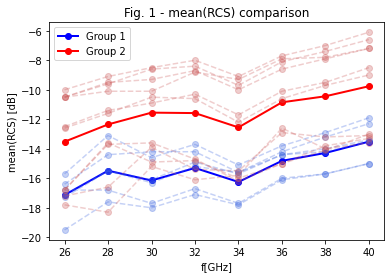

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.close("all")

#ax = plt.gca()


plt.plot(meanRCS.loc[(meanRCS['Group'] == 1)]['f[GHz]'],meanRCS.loc[(meanRCS['Group'] == 1)]['mu'],'o-', color='blue',label='Group 1', linewidth=2)
plt.plot(meanRCS.loc[(meanRCS['Group'] == 2)]['f[GHz]'],meanRCS.loc[(meanRCS['Group'] == 2)]['mu'],'o-', color='red', label='Group 2', linewidth=2)
plt.xlabel('f[GHz]')
plt.ylabel('mean(RCS) [dB]')


posType = ['HH', 'VV', 'HV', 'VH']

for k in posType:
    tmp = df.loc[(df['Pos'] == k)]

    for i in tmp.loc[(df['Group'] == 1)]['Model'].unique():
        plt.plot(tmp.loc[(tmp['Model'] == i)]['f[GHz]'],tmp.loc[(tmp['Model'] == i)]['mu'],'o--', color='royalblue', alpha=0.3)

    
    for i in tmp.loc[(tmp['Group'] == 2)]['Model'].unique():
        plt.plot(tmp.loc[(tmp['Model'] == i)]['f[GHz]'],tmp.loc[(tmp['Model'] == i)]['mu'],'o--', color='indianred', alpha=0.3)

plt.title('Fig. 1 - mean(RCS) comparison', fontdict=None, loc='center', pad=None)
plt.legend()


plt.savefig(my_path[0] + f"/Figures/Fig. 1 - mean(RCS) comparison.png")

# Figura 2.
La std non dipende dal drone ne' dalla frequenza. Quindi non la usiamo nel modello statistico. (lo verifichiamo nel modello per vedere come differisce) (differenza di un ordine di grandezza)

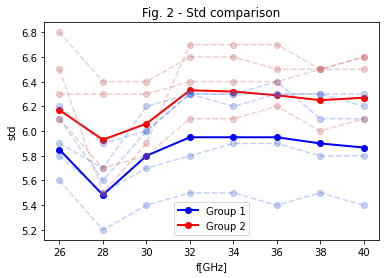

In [6]:
#meanRCS.loc[(meanRCS['Group'] == 1)]['std']
#meanRCS.loc[(meanRCS['Group'] == 2)]['std']

plt.plot(meanRCS.loc[(meanRCS['Group'] == 1)]['f[GHz]'],meanRCS.loc[(meanRCS['Group'] == 1)]['std'],'o-', color='blue', label='Group 1', linewidth=2)
plt.plot(meanRCS.loc[(meanRCS['Group'] == 2)]['f[GHz]'],meanRCS.loc[(meanRCS['Group'] == 2)]['std'],'o-', color='red', label='Group 2', linewidth=2)
plt.xlabel('f[GHz]')
plt.ylabel('std')


posType = ['HH']

for k in posType:
    tmp = df.loc[(df['Pos'] == k)]

    for i in tmp.loc[(df['Group'] == 1)]['Model'].unique():
        plt.plot(tmp.loc[(tmp['Model'] == i)]['f[GHz]'],tmp.loc[(tmp['Model'] == i)]['std'],'o--', color='royalblue', alpha=0.3)

    
    for i in tmp.loc[(tmp['Group'] == 2)]['Model'].unique():
        plt.plot(tmp.loc[(tmp['Model'] == i)]['f[GHz]'],tmp.loc[(tmp['Model'] == i)]['std'],'o--', color='indianred', alpha=0.3)


plt.title('Fig. 2 - Std comparison', fontdict=None, loc='center', pad=None)
plt.legend()
plt.savefig(my_path[0] + f"/Figures/Fig. 2 - Std comparison.png")

Da come si vede nel grafico possiamo approssimare la deviazione standard a 6dB, come enunciato nel paper.

# Figura 3 
media e varianza (dei droni singoli o dei gruppi?) non dipendono da HH e VV. Quindi possiamo limitarci a usarne una (nel senso che usi quella che hai)

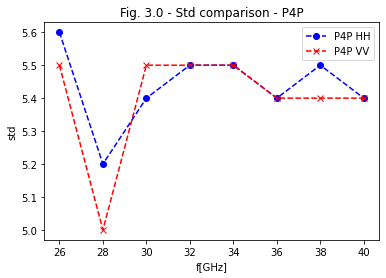

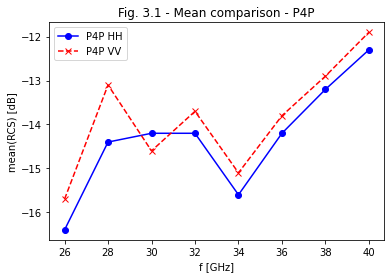

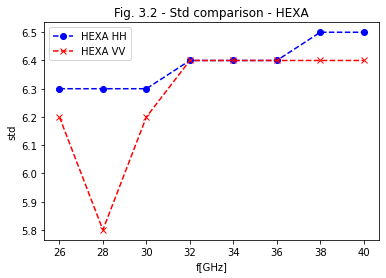

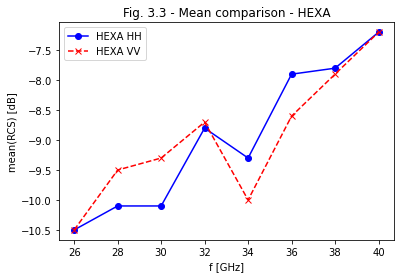

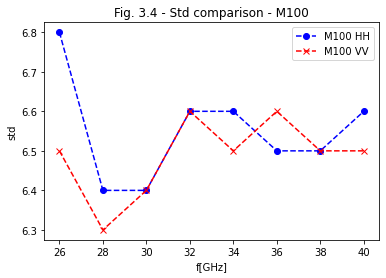

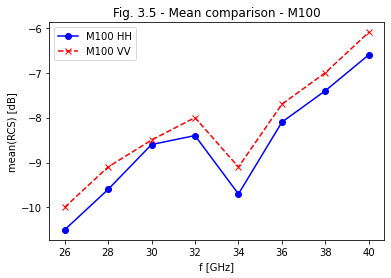

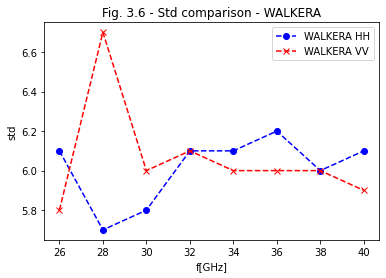

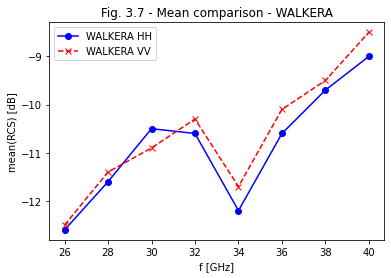

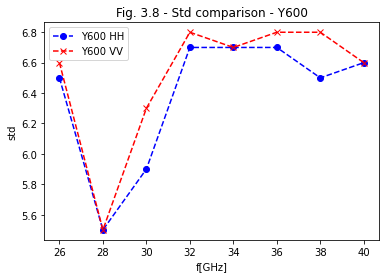

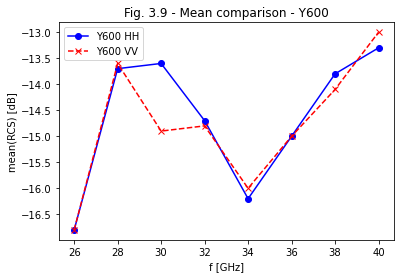

In [7]:
HHVVdrones = df.loc[(df['Pos'] == 'VV')]['Model'].unique()
c = 0

# fig.savefig(my_path + '/Sub Directory/graph.png')
for i in HHVVdrones:
    plot0 = plt.figure(c)
    plt.plot(df.loc[(df['Model'] == i) & (df['Pos'] == 'HH')]['f[GHz]'], df.loc[(df['Model'] == i) & (df['Pos'] == 'HH')]['std'] ,'o--', color='blue', label=i+' HH')
    plt.plot(df.loc[(df['Model'] == i) & (df['Pos'] == 'VV')]['f[GHz]'], df.loc[(df['Model'] == i) & (df['Pos'] == 'VV')]['std'] ,'x--', color='red', label=i+' VV')
    plt.xlabel('f[GHz]')
    plt.ylabel('std')
    plt.legend()
    plt.title(f"Fig. 3.{c} - Std comparison - {i}")
    plt.savefig(my_path[0] + f"/Figures/Figure 3/Fig. 3.{c} - Std comparison - {i}.png")
    c += 1
    
    plot = plt.figure(c)
    plt.plot(df.loc[(df['Model'] == i) & (df['Pos'] == 'HH')]['f[GHz]'], df.loc[(df['Model'] == i) & (df['Pos'] == 'HH')]['mu'] ,'o-', color='blue', label=i+' HH')
    plt.plot(df.loc[(df['Model'] == i) & (df['Pos'] == 'VV')]['f[GHz]'], df.loc[(df['Model'] == i) & (df['Pos'] == 'VV')]['mu'] ,'x--', color='red', label=i+' VV')
    plt.xlabel('f [GHz]')
    plt.ylabel('mean(RCS) [dB]')
    plt.legend()
    plt.title(f"Fig. 3.{c} - Mean comparison - {i}")
    plt.savefig(my_path[0] + f"/Figures/Figure 3/Fig. 3.{c} - Mean comparison - {i}.png")
    c += 1

# Figura 4
Le cross-polarization HV danno RCS piccoli rispetto a HH e VV. Quindi anche media e varianza sono piu' piccole. Di fatto le distibuzioni/pdf(probability distribution function) sono sfalsate rispetto a quelle di HH. Quindi non usiamo HV.

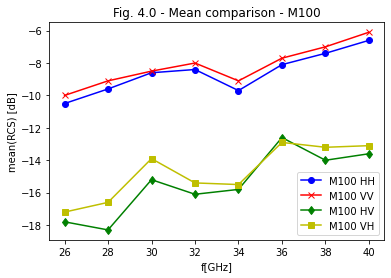

In [8]:
plt.plot(df.loc[(df['Model'] == 'M100') & (df['Pos'] == 'HH')]['f[GHz]'], df.loc[(df['Model'] == 'M100') & (df['Pos'] == 'HH')]['mu'] ,'o-', color='blue', label='M100 HH')
plt.plot(df.loc[(df['Model'] == 'M100') & (df['Pos'] == 'VV')]['f[GHz]'], df.loc[(df['Model'] == 'M100') & (df['Pos'] == 'VV')]['mu'] ,'x-', color='red', label='M100 VV')
plt.plot(df.loc[(df['Model'] == 'M100') & (df['Pos'] == 'HV')]['f[GHz]'], df.loc[(df['Model'] == 'M100') & (df['Pos'] == 'HV')]['mu'] ,'d-', color='g', label='M100 HV')
plt.plot(df.loc[(df['Model'] == 'M100') & (df['Pos'] == 'VH')]['f[GHz]'], df.loc[(df['Model'] == 'M100') & (df['Pos'] == 'VH')]['mu'] ,'s-', color='y', label='M100 VH')

plt.xlabel('f[GHz]')
plt.ylabel('mean(RCS) [dB]')
plt.legend()
plt.title('Fig. 4.0 - Mean comparison - M100')
plt.savefig(my_path[0] + f"/Figures/Fig. 4.0 - Mean comparison - M100.png")

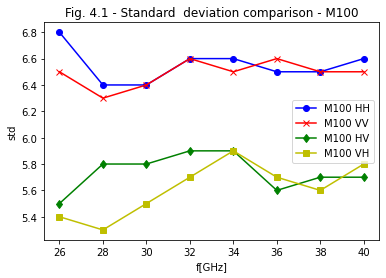

In [39]:
plt.plot(df.loc[(df['Model'] == 'M100') & (df['Pos'] == 'HH')]['f[GHz]'], df.loc[(df['Model'] == 'M100') & (df['Pos'] == 'HH')]['std'] ,'o-', color='blue', label='M100 HH')
plt.plot(df.loc[(df['Model'] == 'M100') & (df['Pos'] == 'VV')]['f[GHz]'], df.loc[(df['Model'] == 'M100') & (df['Pos'] == 'VV')]['std'] ,'x-', color='red', label='M100 VV')
plt.plot(df.loc[(df['Model'] == 'M100') & (df['Pos'] == 'HV')]['f[GHz]'], df.loc[(df['Model'] == 'M100') & (df['Pos'] == 'HV')]['std'] ,'d-', color='g', label='M100 HV')
plt.plot(df.loc[(df['Model'] == 'M100') & (df['Pos'] == 'VH')]['f[GHz]'], df.loc[(df['Model'] == 'M100') & (df['Pos'] == 'VH')]['std'] ,'s-', color='y', label='M100 VH')

plt.xlabel('f[GHz]')
plt.ylabel('std')
plt.legend()
plt.title('Fig. 4.1 - Standard  deviation comparison - M100')
plt.savefig(my_path[0] + f"/Figures/Fig. 4.1 - Standard  deviation comparison - M100.png")

# Figura 5
Usiamo anche il max(RCS) per distinguere i gruppi.

In [40]:
df6 = df.drop(columns=['mu', 'std'])
df6 = df6.loc[ (df6['Pos'] == 'HH')]

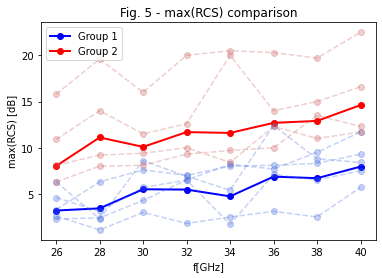

In [41]:
plt.plot(meanRCS.loc[(meanRCS['Group'] == 1)]['f[GHz]'],meanRCS.loc[(meanRCS['Group'] == 1)]['max'],'o-', color='blue',label='Group 1', linewidth=2)
plt.plot(meanRCS.loc[(meanRCS['Group'] == 2)]['f[GHz]'],meanRCS.loc[(meanRCS['Group'] == 2)]['max'],'o-', color='red', label='Group 2', linewidth=2)
plt.xlabel('f[GHz]')
plt.ylabel('max(RCS) [dB]')

for i in onlyHH1['Model'].unique():
    plt.plot(onlyHH1.loc[(onlyHH1['Model'] == i)]['f[GHz]'],onlyHH1.loc[(onlyHH1['Model'] == i)]['max'],'o--', color='royalblue', alpha=0.3)

for i in onlyHH2['Model'].unique():
    plt.plot(onlyHH2.loc[(onlyHH2['Model'] == i)]['f[GHz]'],onlyHH2.loc[(onlyHH2['Model'] == i)]['max'],'o--', color='indianred', alpha=0.3)

plt.title('Fig. 5 - max(RCS) comparison', fontdict=None, loc='center', pad=None)
plt.legend()
plt.savefig(my_path[0] + f"/Figures/Fig. 5 - max(RCS) comparison.png")

# Classifiers - Group
Importing libraries

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

import numpy as np
# used to save / import models
import joblib

[Colorbar DOCS Example](https://matplotlib.org/2.0.2/examples/api/colorbar_only.html)

### Test and train datasets

In [43]:
df = pd.read_excel('table2.ods')  

train = df.loc[(df['Pos'] == 'HH')]
test = df.loc[(df['Pos'] == 'VV')]

x1_model = test['Model']
x1_freq = test['f[GHz]']

SGDC Classifier - score(HH): 0.9444444444444444, score(VV): 0.925
K Nearest Neighbors - score(HH): 0.9027777777777778, score(VV): 0.85
Decision Tree Classifier - score(HH): 1.0, score(VV): 0.9


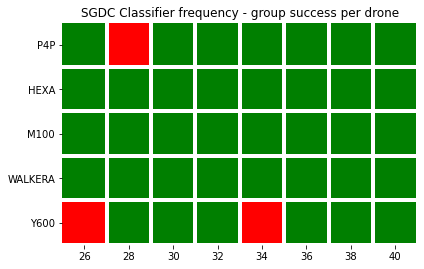

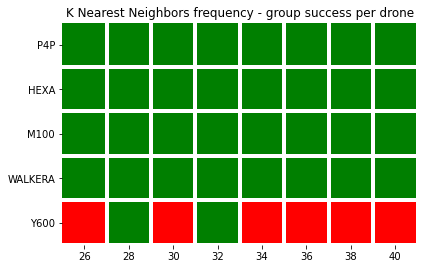

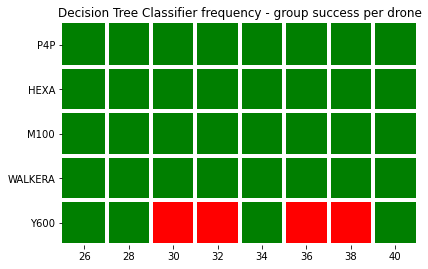

In [44]:
# loop with 3 classifiers.
X = train.drop(columns=['Model', 'Pos','std','Group'])
y = train['Group']
y1 = test['Group']
X1 = test.drop(columns=['Model', 'Pos','std','Group'])


# Define Classifiers
clf = make_pipeline(StandardScaler(), SGDClassifier(n_jobs = -1, max_iter=11000, tol=1e-3, learning_rate='adaptive', eta0=1))

neigh = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)

model = DecisionTreeClassifier()

# CLF Array
classifiers = [clf, neigh, model]
classifier_name = ['SGDC Classifier', 'K Nearest Neighbors', 'Decision Tree Classifier']

# loop
def classifier_test(X,y,X1,y1,s,i):
    k = 0
    for classifier, j in zip(classifiers, classifier_name):
        model = classifier.fit(X,y)
        print(f"{j} - score(HH): {classifier.score(X,y)}, score(VV): {classifier.score(X1,y1)}")
        
        if s == "frequency - group" or s == "std": 
            filename = my_path[0] + f"/models/group recognition/{i}-{j} {s}.sav"
        else:
            filename = my_path[0] + f"/models/drone recognition/{i}-{j} {s}.sav"

        joblib.dump(model, filename)
        
        y1_predicted = classifier.predict(X1)

        a = [1 if n == np else 0 for (n, np) in zip(y1, y1_predicted)]
        n_freq = len(x1_freq.unique())
        n_drones = int(len(x1_freq) / n_freq)
        mat = [a[offset*n_freq : offset*n_freq+n_freq] for offset in range(n_drones)]

        # CMAP settings (colors red and green with normalization)
        cmap = cm.cool
        norm = cm.colors.Normalize(vmin=0, vmax=1)

        cmap = cm.colors.ListedColormap(['r','g'])
        cmap.set_over('0.25')
        cmap.set_under('0.75')

        # Plot
        fig, ax = plt.subplots()
        im = ax.imshow(mat, cmap=cmap, norm=norm)

        # Data
        ax.spines[:].set_visible(False)
        ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
        xticks = [float(i) for i in range(len(x1_freq.unique()))]
        yticks = [float(i) for i in range(len(x1_model.unique()))]
        
        
        ax.set_xticks(xticks)
        ax.set_xticklabels([str(f) for f in x1_freq.unique()])
        ax.set_yticks(yticks)
        ax.set_yticklabels(x1_model.unique())
        
        
        # White spaces
        ax.set_xticks([(i+1)-.5 for i in xticks], minor=True)
        ax.set_yticks([(i+1)-.5 for i in yticks], minor=True)
        ax.grid(which="minor", color="w", linestyle='-', linewidth=4)
        ax.tick_params(which="minor", bottom=False, left=False)

        # Plot title
        ax.set_title(f"{j} {s} success per drone")
        fig.set_tight_layout(True)
        plt.savefig(my_path[0] + f"/Figures/Figure {i}/Fig{i}.{k} {j} {s} success per drone.png")
        k += 1
classifier_test(X,y,X1,y1,"frequency - group",6)

## Showing the difference with 'std'

SGDC Classifier - score(HH): 1.0, score(VV): 1.0
K Nearest Neighbors - score(HH): 0.9027777777777778, score(VV): 0.85
Decision Tree Classifier - score(HH): 1.0, score(VV): 0.975


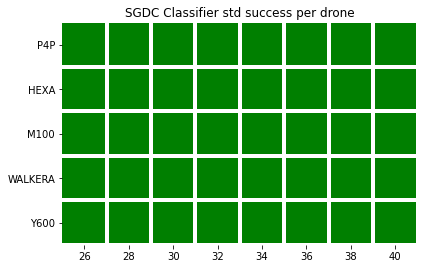

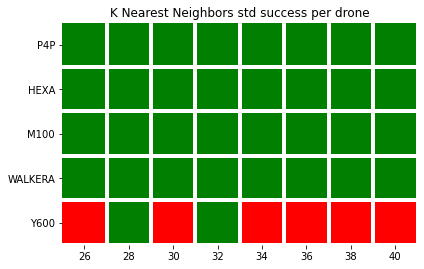

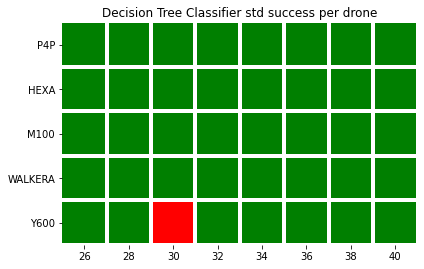

In [45]:
X = train.drop(columns=['Model', 'Pos', 'Group'])
y = train['Group']
y1 = test['Group']
X1 = test.drop(columns=['Model', 'Pos', 'Group'])
classifier_test(X,y,X1,y1,"std",6)

# Classifiers - drone
### Test and train datasets

SGDC Classifier - score(HH): 0.6111111111111112, score(VV): 0.625
K Nearest Neighbors - score(HH): 0.4861111111111111, score(VV): 0.625
Decision Tree Classifier - score(HH): 1.0, score(VV): 0.625


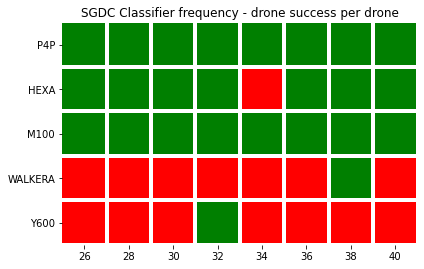

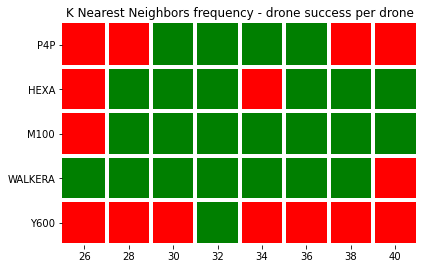

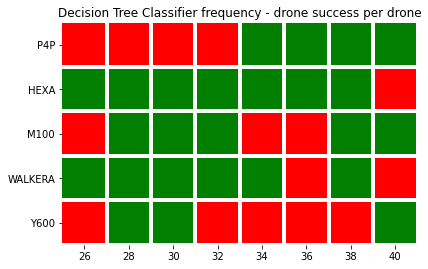

In [46]:
train = df.loc[(df['Pos'] == 'HH')]
test = df.loc[(df['Pos'] == 'VV')]

y = train['Model']
X = train.drop(columns=['Group', 'Model', 'Pos','std'])
y1 = test['Model']
X1 = test.drop(columns=['Group', 'Model', 'Pos','std'])

x1_model = test['Model']
x1_freq = test['f[GHz]']

classifier_test(X,y,X1,y1,"frequency - drone",7)

# FIN